In [5]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog
from tqdm import tqdm
import itertools
import math

In [22]:
def adp_filt(currdf: object, pose):
    lIndex = []
    xIndex = []
    yIndex = []
    currdf = np.array(currdf[1:])
    for header in pose:
        if currdf[0][header + 1] == "likelihood":
            lIndex.append(header)
        elif currdf[0][header + 1] == "x":
            xIndex.append(header)
        elif currdf[0][header + 1] == "y":
            yIndex.append(header)
    curr_df1 = currdf[:, 1:]
    datax = curr_df1[1:, np.array(xIndex)]
    datay = curr_df1[1:, np.array(yIndex)]
    data_lh = curr_df1[1:, np.array(lIndex)]
    currdf_filt = np.zeros((datax.shape[0], (datax.shape[1]) * 2))
    perc_rect = []
    for i in range(data_lh.shape[1]):
        perc_rect.append(0)
    for x in tqdm(range(data_lh.shape[1])):
        a, b = np.histogram(data_lh[1:, x].astype(np.float))
        rise_a = np.where(np.diff(a) >= 0)
        if rise_a[0][0] > 1:
            llh = b[rise_a[0][0]]
        else:
            llh = b[rise_a[0][1]]
        # llh=0
        data_lh_float = data_lh[:, x].astype(np.float)
        perc_rect[x] = np.sum(data_lh_float < llh) / data_lh.shape[0]
        currdf_filt[0, (2 * x):(2 * x + 2)] = np.hstack([datax[0, x], datay[0, x]])
        for i in range(1, data_lh.shape[0]):
            if data_lh_float[i] < llh:
                currdf_filt[i, (2 * x):(2 * x + 2)] = currdf_filt[i - 1, (2 * x):(2 * x + 2)]
            else:
                currdf_filt[i, (2 * x):(2 * x + 2)] = np.hstack([datax[i, x], datay[i, x]])
    currdf_filt = np.array(currdf_filt)
    currdf_filt = currdf_filt.astype(np.float)
    return currdf_filt, perc_rect

def boxcar_center(a, n):
    a1 = pd.Series(a)
    moving_avg = np.array(a1.rolling(window=n, min_periods=1, center=True).mean())

    return moving_avg

In [8]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load deeplabcut csv')

%gui tk

In [9]:
infiles

('D:/Jack/Project/P16/091322/VideoOutputCamera 0-13092022-151115_4DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv',)

In [11]:
df = pd.read_csv(infiles[0], low_memory=False)

In [13]:
df

,scorer,DLC_resnet50_bottomup_clearSep21shuffle1_1030000,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.1,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.2,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.3,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.4,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.5,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.6,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.7,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.8,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.9,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.10,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.11,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.12,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.13,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.14,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.15,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.16,DLC_resnet50_bottomup_clearSep21shuffle1_1030000.17
0,bodyparts,snout,snout,snout,right-forepaw,right-forepaw,right-forepaw,left-forepaw,left-forepaw,left-forepaw,right-hindpaw,right-hindpaw,right-hindpaw,left-hindpaw,left-hindpaw,left-hindpaw,tail-base,tail-base,tail-base
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,435.9876708984375,560.689208984375,0.9939249157905579,393.08721923828125,537.0178833007812,0.9989898800849915,416.2325439453125,558.9761962890625,0.9955258965492249,361.3850402832031,585.9788818359375,0.9977632761001587,423.3175964355469,578.1294555664062,0.9996032118797302,395.125732421875,594.148681640625,0.9997925162315369
3,1,441.06915283203125,561.8179321289062,0.9978931546211243,392.6453857421875,535.4771118164062,0.9977461695671082,416.8726501464844,562.377197265625,0.9935584664344788,360.0098876953125,585.4894409179688,0.9981614947319031,425.38824462890625,579.9000244140625,0.9993687272071838,394.9706115722656,594.1847534179688,0.9991627931594849
4,2,442.9737548828125,558.51806640625,0.9991984963417053,392.6620178222656,535.22314453125,0.9958426356315613,420.083984375,561.4807739257812,0.9959467053413391,360.54632568359375,583.9310913085938,0.9959483742713928,424.3224182128906,581.3569946289062,0.9995381832122803,390.7017822265625,593.780029296875,0.9994631409645081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,10105,343.4318542480469,218.57672119140625,0.0403088703751564,343.4953918457031,230.7953643798828,0.9591385126113892,343.09344482421875,214.7045440673828,0.9853905439376831,362.7923278808594,276.5528259277344,0.999742329120636,358.6633605957031,212.2652587890625,0.999609649181366,384.200439453125,248.55398559570312,0.9998041987419128
10108,10106,343.0425720214844,218.23953247070312,0.05308433994650841,344.2577819824219,228.93667602539062,0.9307138919830322,343.4128112792969,213.6305389404297,0.9843295216560364,363.0226745605469,276.0090637207031,0.9997153878211975,358.5684814453125,211.98789978027344,0.9993234872817993,383.7603454589844,249.3719940185547,0.9996275901794434
10109,10107,342.7061462402344,218.07704162597656,0.04767234995961189,345.0586242675781,228.36599731445312,0.9037243723869324,342.322265625,213.00572204589844,0.9866642951965332,363.4132995605469,276.6611633300781,0.9996445178985596,359.0036315917969,211.9013671875,0.9993429780006409,382.001220703125,249.0904083251953,0.9995032548904419
10110,10108,342.7009582519531,218.30638122558594,0.05921952798962593,344.37603759765625,231.33009338378906,0.9734306931495667,343.36181640625,214.25514221191406,0.9881755113601685,363.26953125,277.1885986328125,0.99955815076828,359.1960754394531,212.1234893798828,0.9993019104003906,384.5852355957031,250.33079528808594,0.9998321533203125


In [18]:
clf = random_forest_sav[3]
clf

RandomForestClassifier(max_features='auto', random_state=42)

In [29]:
csv_array_filtered, perc_filtered = adp_filt(df, np.arange(18))

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\Users\jimi\AppData\Local\Temp\ipykernel_9268\3076676940.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a, b = np.histogram(data_lh[1:, x].astype(np.float))
C:\Users\jimi\AppData\Local\Temp\ipykernel_9268\3076676940.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://num

In [31]:
# csv_array.shape
processed_input_data = [csv_array_filtered.copy()]

In [32]:
framerate = 30
window = np.int(np.round(0.05 / (1 / framerate)) * 2 - 1)
f = []
for n in range(len(processed_input_data)):
    data_n_len = len(processed_input_data[n])
    dxy_list = []
    disp_list = []
    for r in range(data_n_len):
        if r < data_n_len - 1:
            disp = []
            for c in range(0, processed_input_data[n].shape[1], 2):
                disp.append(
                    np.linalg.norm(processed_input_data[n][r + 1, c:c + 2] -
                                   processed_input_data[n][r, c:c + 2]))
            disp_list.append(disp)
        dxy = []
        for i, j in itertools.combinations(range(0, processed_input_data[n].shape[1], 2), 2):
            dxy.append(processed_input_data[n][r, i:i + 2] -
                       processed_input_data[n][r, j:j + 2])
        dxy_list.append(dxy)
    disp_r = np.array(disp_list)
    dxy_r = np.array(dxy_list)
    disp_boxcar = []
    dxy_eu = np.zeros([data_n_len, dxy_r.shape[1]])
    ang = np.zeros([data_n_len - 1, dxy_r.shape[1]])
    dxy_boxcar = []
    ang_boxcar = []
    for l in range(disp_r.shape[1]):
        disp_boxcar.append(boxcar_center(disp_r[:, l], window))
        # disp_boxcar.append(disp_r[:, l])
    for k in range(dxy_r.shape[1]):
        for kk in range(data_n_len):
            dxy_eu[kk, k] = np.linalg.norm(dxy_r[kk, k, :])
            if kk < data_n_len - 1:
                b_3d = np.hstack([dxy_r[kk + 1, k, :], 0])
                a_3d = np.hstack([dxy_r[kk, k, :], 0])
                c = np.cross(b_3d, a_3d)
                ang[kk, k] = np.dot(np.dot(np.sign(c[2]), 180) / np.pi,
                                    math.atan2(np.linalg.norm(c),
                                               np.dot(dxy_r[kk, k, :], dxy_r[kk + 1, k, :])))
        dxy_boxcar.append(boxcar_center(dxy_eu[:, k], window))
        ang_boxcar.append(boxcar_center(ang[:, k], window))
        # dxy_boxcar.append(dxy_eu[:, k])
        # ang_boxcar.append(ang[:, k])
    disp_feat = np.array(disp_boxcar)
    dxy_feat = np.array(dxy_boxcar)
    ang_feat = np.array(ang_boxcar)
    f.append(np.vstack((dxy_feat[:, 1:], ang_feat, disp_feat)))

for m in range(0, len(f)):
    f_integrated = np.zeros(len(processed_input_data[m]))
    for k in range(round(framerate / 10), len(f[m][0]), round(framerate / 10)):
        if k > round(framerate / 10):
            f_integrated = np.concatenate(
                (f_integrated.reshape(f_integrated.shape[0], f_integrated.shape[1]),
                 np.hstack((np.mean((f[m][0:dxy_feat.shape[0],
                                     range(k - round(framerate / 10), k)]), axis=1),
                            np.sum((f[m][dxy_feat.shape[0]:f[m].shape[0],
                                    range(k - round(framerate / 10), k)]), axis=1)
                            )).reshape(len(f[0]), 1)), axis=1
            )
        else:
            f_integrated = np.hstack(
                (np.mean((f[m][0:dxy_feat.shape[0], range(k - round(framerate / 10), k)]), axis=1),
                 np.sum((f[m][dxy_feat.shape[0]:f[m].shape[0],
                         range(k - round(framerate / 10), k)]), axis=1))).reshape(len(f[0]), 1)
    if m > 0:
        features = np.concatenate((features, f_integrated), axis=1)
    else:
        features = f_integrated

C:\Users\jimi\AppData\Local\Temp\ipykernel_9268\1596035890.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window = np.int(np.round(0.05 / (1 / framerate)) * 2 - 1)


In [33]:
f_integrated.T.shape

(3369, 36)

In [34]:
X = features.T.copy()
predictions = clf.predict(X)

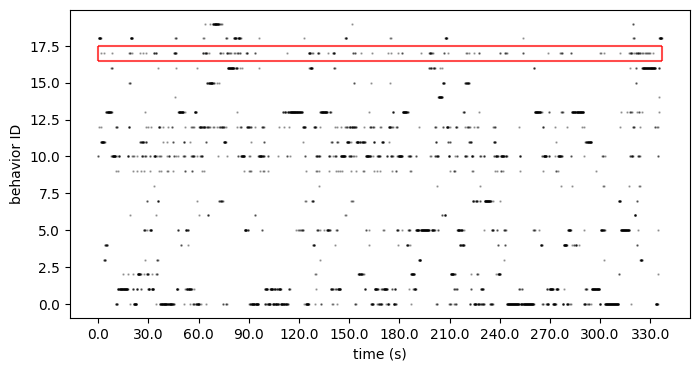

In [38]:
class_of_interest=17
jitter=0.5
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.hlines(class_of_interest-jitter, 0, len(predictions), 'r', alpha=0.7)
ax.hlines(class_of_interest+jitter, 0, len(predictions), 'r', alpha=0.7)
ax.vlines(0-jitter, class_of_interest-jitter, class_of_interest+jitter, 'r', alpha=0.7)
ax.vlines(len(predictions)+jitter, class_of_interest-jitter, class_of_interest+jitter, 'r', alpha=0.7)
ax.scatter(np.arange(len(predictions)), predictions, s=0.5, color='k', alpha=0.3)
ax.set_xticks(np.arange(0, len(predictions), 300))
ax.set_xticklabels(np.arange(0, len(predictions)/10, 30))
ax.set_ylabel('behavior ID')
ax.set_xlabel('time (s)')
fig.savefig('./test.png', dpi=600)